# Introduction

The evolution of camera technology has no boundaries. The fact that smartphones and laptop has camera makes it easier to share anything across the internet and the whole world. Almost everything could be link to camera. Few years back, Google has established Google Lens. This is one among many developments in computer vision. Computer vision could enhance the available technology to another level. From security to medical equipments and smart cars, there would always be opportunities for this technology. Machine learning, artificial intelligence and augmented reality these are all possible with computer vision system. Language learning and the development of modules and library are the factors that help the system to be more than just detecting objects.

Object detection is one of the techniques that allows a system to identify or locate objects in a given images or real - time data through webcam or camera. With these abilities, the distance, shape, size, colour or even object tracking are possible. The system is able to label objects and simultaneously classify several objects at once. The images will be classify through data classes that had been trained. After years, more and more better algorithms have been develop.

Deep learning in computer vision technology has several algorithms such as You Only Look Once (YOLO), Single Shot Detector (SSD) and other neural networks system. These systems require a lot of data for training and its accuracy would depend on this training. In this project, image processing is applied to the input image and object detection is made through template matching. Template matching uses template image to detect the object by finding its location in a larger image. There are several type of modes for template matching. Method of comparison used in this project is TM_CCOEFF.

**Objective**

1.   To detect a scissor among a set of stationery using template matching.
2.   To extract the object feature (edges and shape).
3.   To identify the limitation of the system.





**Motivation**

In computer vision system, object detection is a common and well - known technology. With this in mind, this project is develop in order to observe and understand the basic of object detection. From this small step, we hope to develop more knowledge in this field. To discover possibilities and limitations of a system. Every single object has a distinct feature and this is how by training data, the system could characterize object in real - time data, images or videos.

# Methodology and Results

**Block Diagram**

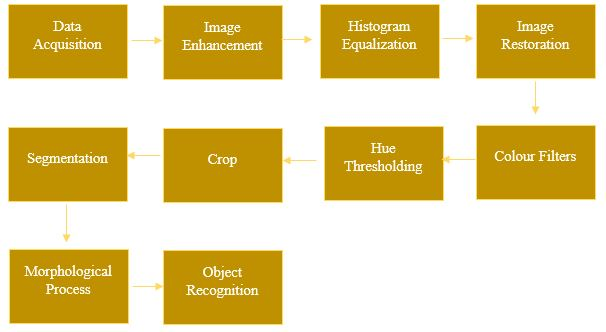

**Flowchart**

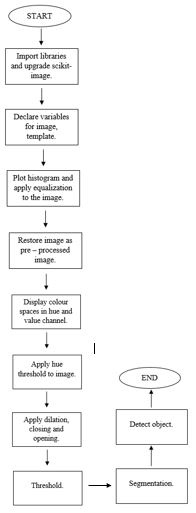

# Data Acquisition

The data acquired is a scissor. Using this command, it will locate the scissor in an image of stationeries.

**Image Files**

Images are uploaded to colab files. The template for scissor image named as **scistemp** and the input image is named as **stationery**. The codes mainly used OpenCV library functions, and result images are displayed using plt command.

In [1]:
!pip install --upgrade scikit-image

Requirement already up-to-date: scikit-image in /usr/local/lib/python3.7/dist-packages (0.18.1)


# Pre - processing

Before applying any filters, pre - processing is really important where we import libraries or upgrade module and read the data to store them in variables also to make enhancement. Upgrading module helps in importing more functions from the library.

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

Shape:  (3233, 1396)


(-0.5, 3119.5, 4159.5, -0.5)

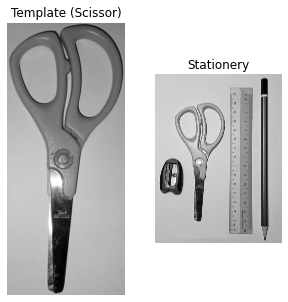

In [3]:
img = cv2.imread('/content/stationery.jpg')
template = cv2.imread('/content/scistemp.jpg')

gimg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gtemplate = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

w, h = gtemplate.shape[::-1]
print("Shape: ", gtemplate.shape)

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(5, 5))

ax0.imshow(gtemplate, cmap='gray')
ax0.set_title("Template (Scissor)")
ax0.axis('off')
ax1.imshow(gimg, cmap='gray')
ax1.set_title("Stationery")
ax1.axis('off')

Here, `img` and `template` variables store the stationery and template image in grayscale. From the `shape` command, it returns 2 values. So, it is represent in 2D Grayscale.

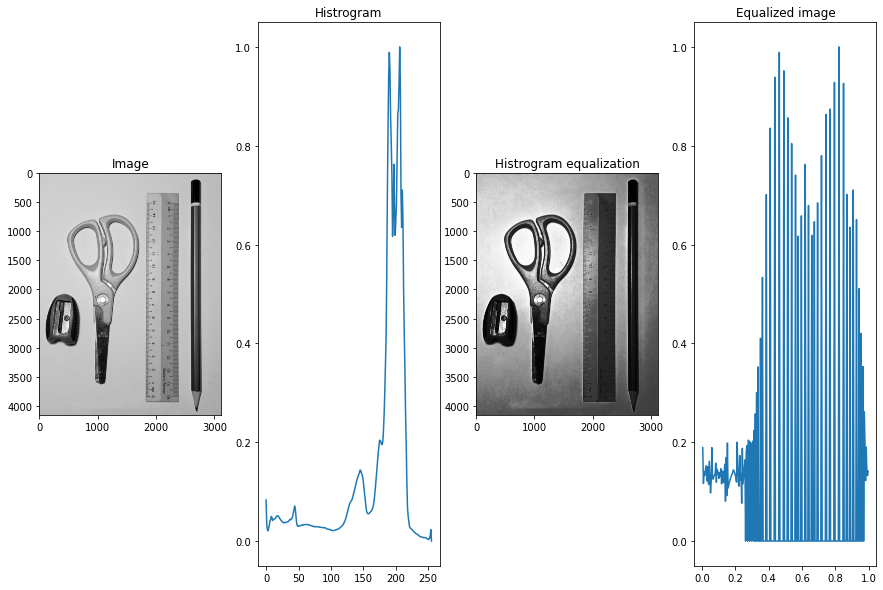

In [4]:
from skimage import exposure
f, axes = plt.subplots(1, 4, figsize=(15, 10))

#title
axes[0].set_title('Image')
axes[1].set_title('Histrogram')
axes[2].set_title('Histrogram equalization')
axes[3].set_title('Equalized image')

axes[0].imshow(gimg, cmap='gray')

img_hist, bins = exposure.histogram(gimg)
axes[1].plot(bins, img_hist / img_hist.max())

histeq_sc = exposure.equalize_hist(gimg)
axes[2].imshow(histeq_sc, cmap='gray')

#Show histrogram distribution for equalize image
eq_img_hist, eq_bins = exposure.histogram(histeq_sc)
axes[3].plot(eq_bins, eq_img_hist / eq_img_hist.max())

#Run show
plt.show()

# Image Processing

Now that the image is already enhanced, the next step is to apply image processing techniques. Color filter plays an important role in object detection.

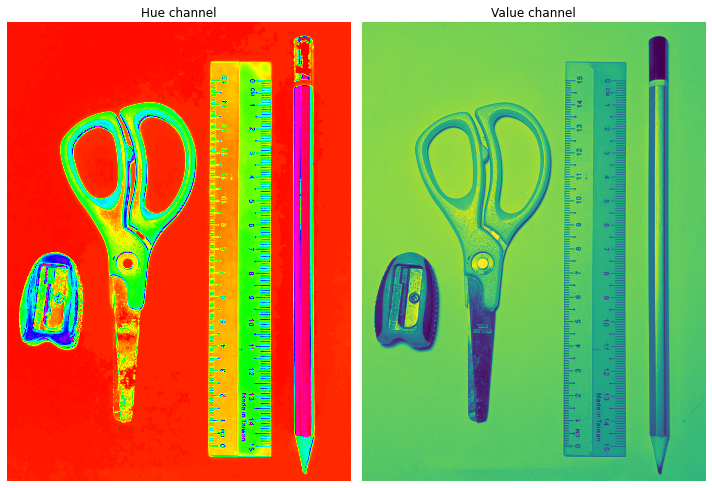

In [5]:
from skimage.color import rgb2hsv, hsv2rgb, gray2rgb

rgb_img = img
hsv_img = rgb2hsv(rgb_img)
hue_img = hsv_img[:, :, 1]
value_img = hsv_img[:, :, 2]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 10))

ax1.imshow(hue_img, cmap='hsv')
ax1.set_title("Hue channel")
ax1.axis('off')
ax2.imshow(value_img)
ax2.set_title("Value channel")
ax2.axis('off')

fig.tight_layout()

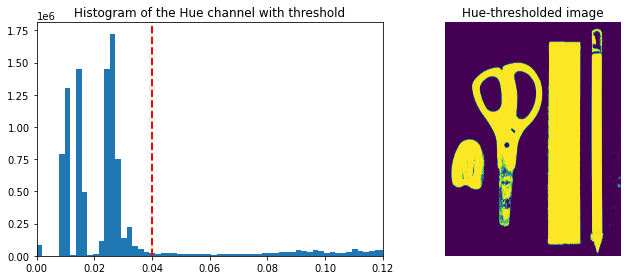

In [6]:
hue_threshold = 0.04
binary_img = hue_img > hue_threshold

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(10, 4))

ax0.hist(hue_img.ravel(), 512)
ax0.set_title("Histogram of the Hue channel with threshold")
ax0.axvline(x=hue_threshold, color='r', linestyle='dashed', linewidth=2)
ax0.set_xbound(0, 0.12)
ax1.imshow(binary_img)
ax1.set_title("Hue-thresholded image")
ax1.axis('off')

fig.tight_layout()

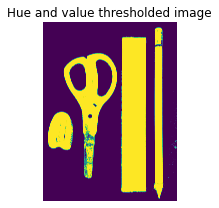

In [7]:
fig, ax0 = plt.subplots(figsize=(4, 3))

value_threshold = 0.10
binary_img = (hue_img > hue_threshold) | (value_img < value_threshold)

ax0.imshow(binary_img)
ax0.set_title("Hue and value thresholded image")
ax0.axis('off')

fig.tight_layout()
plt.show()

#plt.imshow(binary_img)

# Feature Extraction

Hue thresholding helps separate the object from its background. Next, the object will undergoes morphology image processing to extract its edges and features.

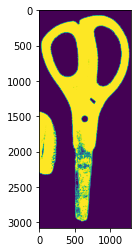

In [8]:
cut_img = binary_img[650:3730, 450:1750]
plt.imshow(cut_img)

Notice that there are different shade in above result. To eliminate the holes and produce better feature, dilation and closing will be applied to the image.

In [9]:
def plot_comparison(original, filtered, filter_name):

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4), sharex=True,
                                   sharey=True)
    ax1.imshow(original, cmap=plt.cm.gray)
    ax1.set_title('original')
    ax1.axis('off')
    ax2.imshow(filtered, cmap=plt.cm.gray)
    ax2.set_title(filter_name)
    ax2.axis('off')

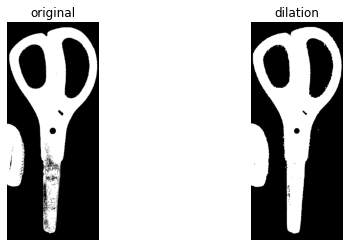

In [10]:
from skimage.morphology import erosion, dilation, opening, closing
from skimage.morphology import skeletonize, convex_hull_image
from skimage.morphology import disk

selem = disk(5)
dilated = dilation(cut_img, selem)
plot_comparison(cut_img, dilated, 'dilation')

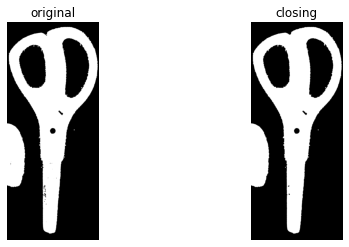

In [11]:
closed = closing(dilated, selem)
plot_comparison(dilated, closed, 'closing')

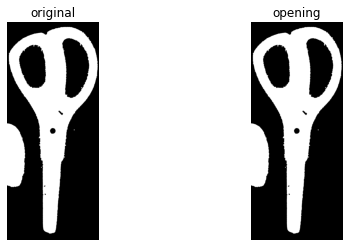

In [16]:
opened = opening(closed, selem)
plot_comparison(closed, opened, 'opening')

After these processes, the edges and shapes of the scissor are now much better than before. The gaps are filled and unwanted holes in the background is reduced.

<string>:6: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


Text(0.5, 1.0, 'SAUVOLA')

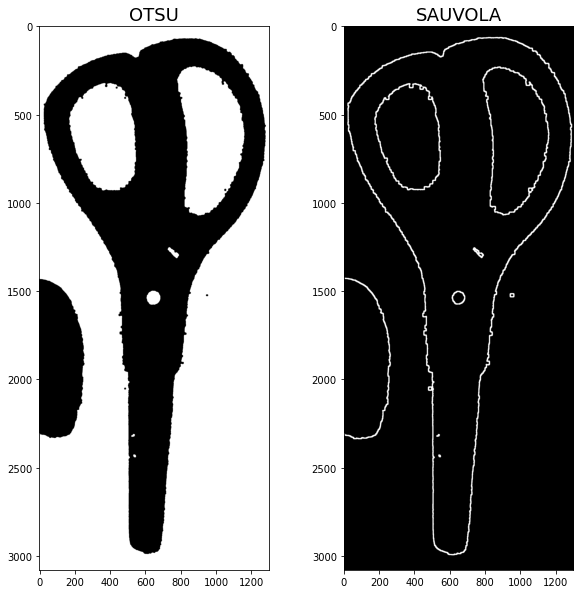

In [15]:
from skimage import filters

text_threshold0 = 0.7
text_threshold1 = filters.threshold_otsu(opened)
text_threshold2 = filters.threshold_sauvola(opened)

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 10))

try2 = opened < text_threshold1
try3 = opened < text_threshold2

ax1.imshow(try2, cmap='gray')
ax1.set_title('OTSU', fontsize=18)

ax2.imshow(try3, cmap='gray')
ax2.set_title('SAUVOLA', fontsize=18)

Through segmentation, by using `otsu` and `sauvola` filters the edges and shape are refined well. 

# Classification

Every single process from data acquisition until feature extraction is really important to classify object. This is only a basic example or illustration on how does modern computer vision works. A large set of data is labelled in their own class. This set of data will be train and since there is a lot of images, the training would take quite a while before it could extract features from the labelled data. Once the training is done, the data will be test on whether or not it could detect specify object.

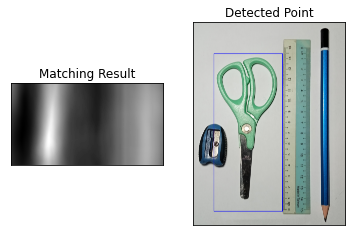

In [14]:
method = cv2.TM_CCOEFF

res = cv2.matchTemplate(img,template,method)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)

cv2.rectangle(img,top_left, bottom_right, 255, 10)

rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.subplot(121),plt.imshow(res,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(rgb,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])

plt.show()

The scissor is detected successfully.

# Conclusion

The classification of the scissor in this project however are based on template matching. So, it works based on the location of the object. It does have a limitation where it could not detect the scissor perfectly if the scissor in image is tilted. The position and angle of the object in template and the image must be similar.

Throughout this project, observing the steps and outcomes of every single image processing had made it understandable on how does object detection system works. The desired output is obtained which to detect a scissor in a stationeries image. Also, the shape and feature of the scissor is able to be extracted after pre - processing and applying filters. 

As a future recommendation, an additional color detection to this object would make a great improvement to the result. There will be other techniques to learn and maybe develop a system where it is able to detect the colour code of resistors.